In [ ]:
import pandas as pd
import numpy as np

: 

In [4]:
df = pd.read_excel('HouseData.xlsx')
df.head()

NameError: name 'pd' is not defined

In [1]:
df.info()

NameError: name 'df' is not defined

In [19]:
df.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
sales          0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.drop_duplicates()

id             date    price  bedrooms  bathrooms  sqft_living  \
0       629000615  20141022T000000  1495000         4       3.25         3070   
1      4141800215  20141126T000000  1495000         4       3.75         3770   
2      6448000020  20150129T000000  1490000         4       2.50         2420   
3      9522300010  20150331T000000  1490000         3       3.50         4560   
4        31000165  20140911T000000  1490000         5       3.50         3620   
...           ...              ...      ...       ...        ...          ...   
21055  3883800011  20141105T000000    82000         3       1.00          860   
21056  3028200080  20150324T000000    81000         2       1.00          730   
21057  8658300340  20140523T000000    80000         1       0.75          430   
21058    40000362  20140506T000000    78000         2       1.00          780   
21059  3421079032  20150217T000000    75000         1       0.00          670   

       sqft_lot  floors waterfront     view         condition  grade  \
0         10375     2.0         No  No View           Average     10   
1          4000     2.5         No  No View         Very Good      9   
2         18480     1.0         No  No View              Good      9   
3         14608     2.0         No  Average           Average     12   
4          7821     2.0         No  Average           Average     10   
...         ...     ...        ...      ...               ...    ...   
21055     10426     1.0         No  No View           Average      6   
21056      9975     1.0         No  No View    Poor- Worn out      5   
21057      5050     1.0         No  No View  Fair- Badly worn      4   
21058     16344     1.0         No  No View    Poor- Worn out      5   
21059     43377     1.0         No  No View           Average      3   

       yr_built  zipcode      lat     long    sales  
0          1962    98004  47.5862 -122.198  1495000  
1          1916    98122  47.6157 -122.287  1495000  
2          1967    98004  47.6214 -122.227  1490000  
3          1990    98034  47.6995 -122.228  1490000  
4          1958    98040  47.5738 -122.215  1490000  
...         ...      ...      ...      ...      ...  
21055      1954    98146  47.4987 -122.341    82000  
21056      1943    98168  47.4808 -122.315    81000  
21057      1912    98014  47.6499 -121.909    80000  
21058      1942    98168  47.4739 -122.280    78000  
21059      1966    98022  47.2638 -121.906    75000  

[21060 rows x 17 columns]

In [ ]:
# if nulls are there

##. df.dropna(inplace=True)

In [9]:
df['sales'] = df['price']  # Since no quantity or discount info is available

In [10]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows outside 1.5 * IQR
df_cleaned = df[~((df['sqft_living'] < (Q1 - 1.5 * IQR)) | (df['sqft_living'] > (Q3 + 1.5 * IQR)))]


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built']
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


<ipython-input-11-d5104f6648ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


In [12]:
print("Before Cleaning:", df.shape)
print("After Cleaning:", df_cleaned.shape)

Before Cleaning: (21060, 17)
After Cleaning: (20677, 17)


##📊 1. Sales Distribution – Mean, Median, Standard Deviation

In [13]:
mean_sales = df_cleaned['sales'].mean()
median_sales = df_cleaned['sales'].median()
std_sales = df_cleaned['sales'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Standard Deviation:", std_sales)

Mean Sales: 490488.70904870145
Median Sales: 440000.0
Standard Deviation: 235374.4967023871


##🧮 2. Mode – Maximum Customer Concentration (Most Frequent Sales Value)
python
Copy
Edit


In [14]:
mode_sales = df_cleaned['sales'].mode()[0]
print("Mode Sales (Most Frequent):", mode_sales)

Mode Sales (Most Frequent): 350000


##🔍 3. Identify High-Value vs. Low-Value Sales
python
Copy
Edit


In [15]:
# Define threshold using mean
high_value_sales = df_cleaned[df_cleaned['sales'] > mean_sales]
low_value_sales = df_cleaned[df_cleaned['sales'] <= mean_sales]

print("High-Value Sales Count:", high_value_sales.shape[0])
print("Low-Value Sales Count:", low_value_sales.shape[0])

High-Value Sales Count: 8526
Low-Value Sales Count: 12151


##📋 1. Frequency Distribution Table + Line Plot
python
Copy
Edit


<ipython-input-35-fa3012dcb140>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sales_bin'] = pd.cut(df_cleaned['sales'], bins=20)


Frequency Distribution Table:
sales_bin
(73580.0, 146000.0]        157
(146000.0, 217000.0]      1085
(217000.0, 288000.0]      2713
(288000.0, 359000.0]      3140
(359000.0, 430000.0]      2899
(430000.0, 501000.0]      2559
(501000.0, 572000.0]      2019
(572000.0, 643000.0]      1573
(643000.0, 714000.0]      1234
(714000.0, 785000.0]      1011
(785000.0, 856000.0]       716
(856000.0, 927000.0]       492
(927000.0, 998000.0]       318
(998000.0, 1069000.0]      185
(1069000.0, 1140000.0]     132
(1140000.0, 1211000.0]     122
(1211000.0, 1282000.0]     105
(1282000.0, 1353000.0]     102
(1353000.0, 1424000.0]      66
(1424000.0, 1495000.0]      49
Name: count, dtype: int64


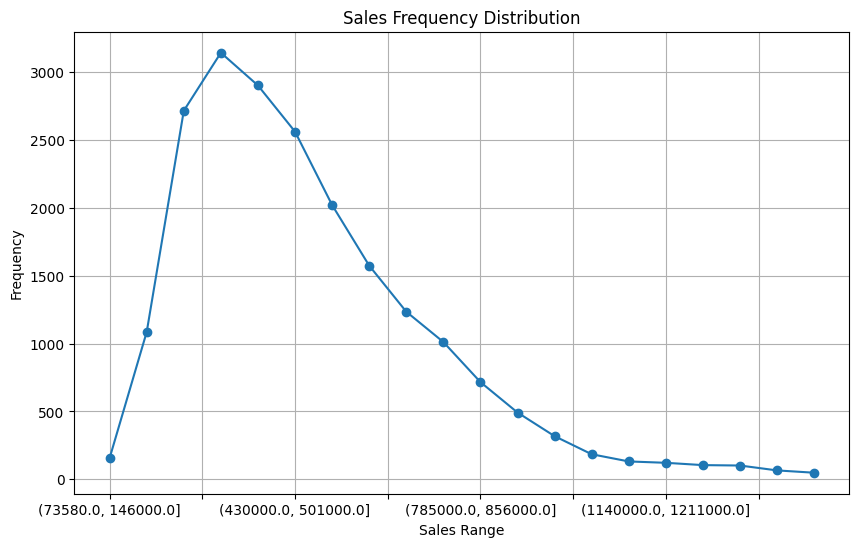

In [35]:
import matplotlib.pyplot as plt

# Grouping sales into bins for frequency table
plt.figure(
    figsize=(10,6)
)
df_cleaned['sales_bin'] = pd.cut(df_cleaned['sales'], bins=20)
frequency_table = df_cleaned['sales_bin'].value_counts().sort_index()

print("Frequency Distribution Table:")
print(frequency_table)

# Line plot for frequency distribution
frequency_table.plot(kind='line', marker='o')
plt.title("Sales Frequency Distribution")
plt.xlabel("Sales Range")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

##📊 2. Histogram of Sales

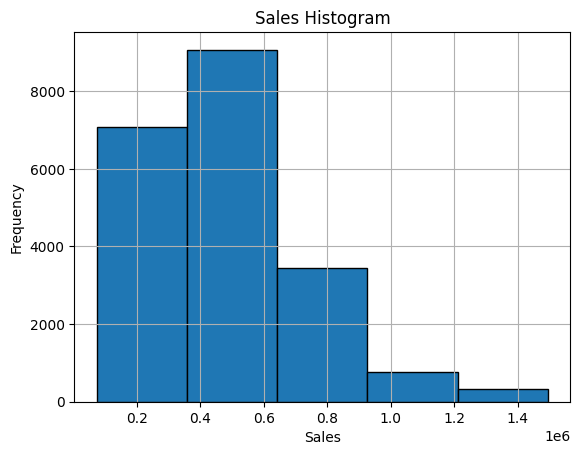

In [17]:
df_cleaned['sales'].hist(bins=5, edgecolor='black')
plt.title("Sales Histogram")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

##🔗 3. Correlation Analysis

In [18]:
correlation = df_cleaned['sales'].corr(df_cleaned['sqft_living'])
print("Correlation between Sales and Sqft Living:", correlation)

Correlation between Sales and Sqft Living: 0.6221263629458095


##📈 4. Scatter Plot with Regression Line (Sales vs. Sqft Living)
python
Copy
Edit


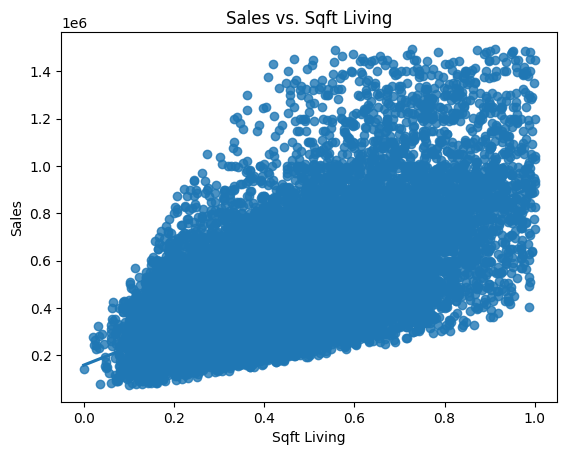

In [26]:
import seaborn as sns

sns.regplot(x='sqft_living', y='sales', data=df_cleaned)
plt.title("Sales vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Sales")
plt.show()

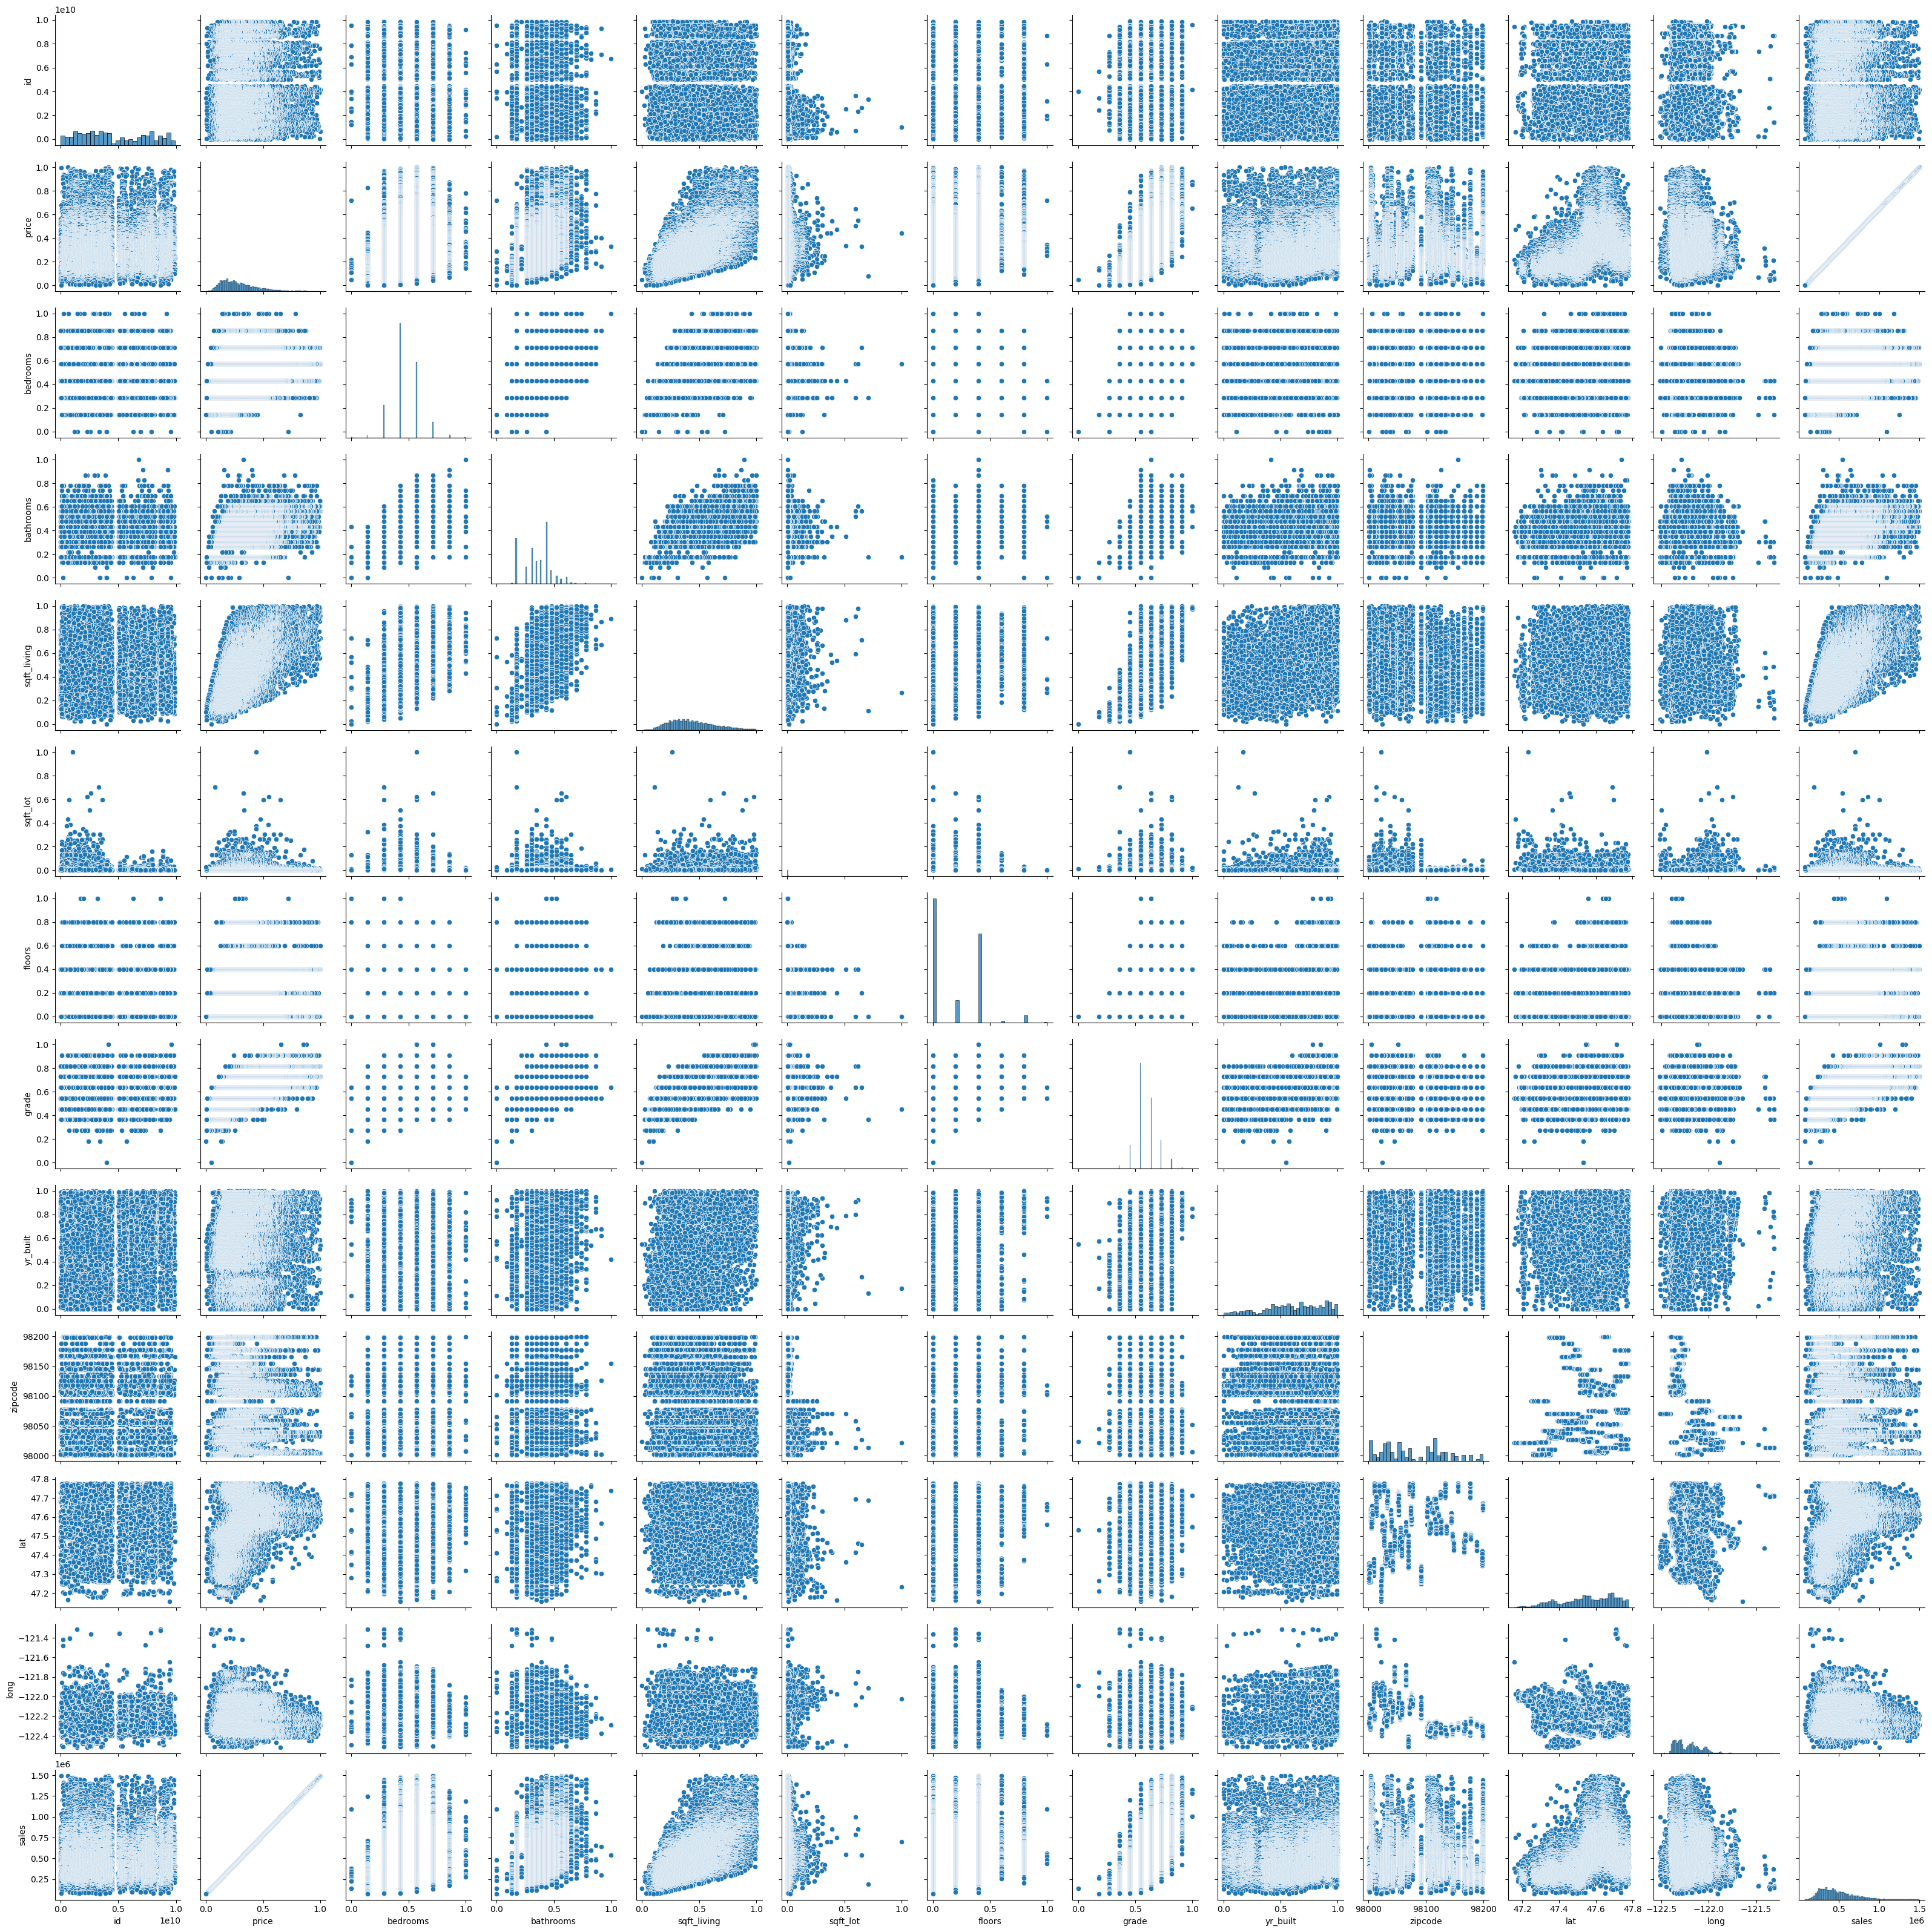

In [27]:
sns.pairplot(df_cleaned)

##💡 7. Correlation Heatmap for Multiple Features

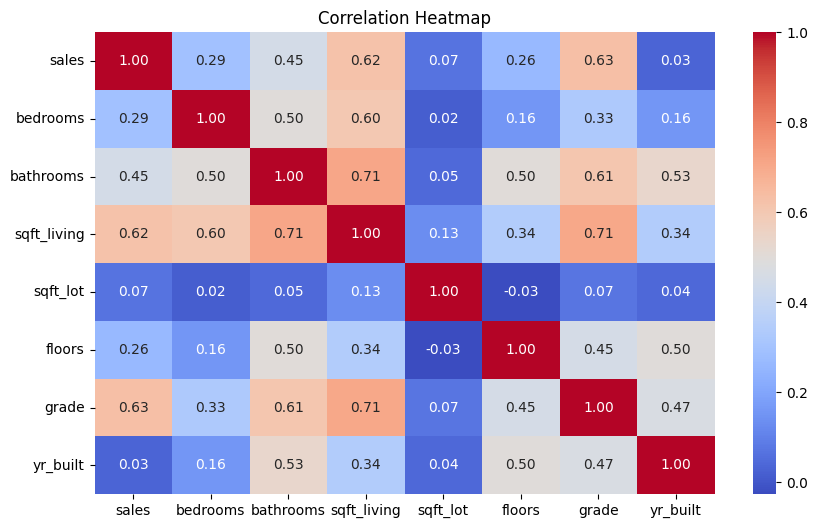

In [28]:
# Select numerical features
corr_matrix = df_cleaned[['sales', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

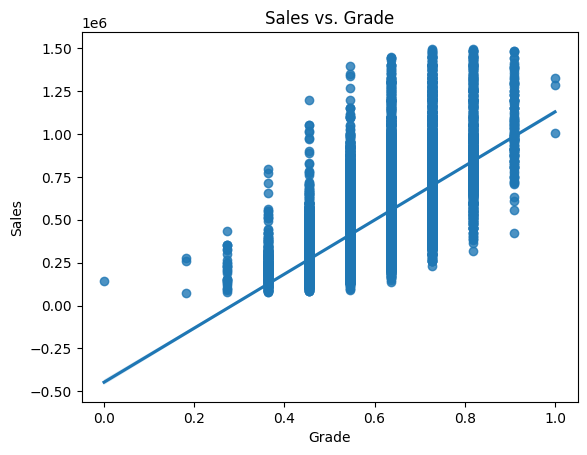

In [36]:
sns.regplot(x='grade', y='sales', data=df_cleaned)
plt.title("Sales vs. Grade")
plt.xlabel("Grade")
plt.ylabel("Sales")
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

X = df_cleaned[['price']]
y = df_cleaned['sales']

model = LinearRegression()
model.fit(X, y)

print("Sales = ", model.coef_[0], "* Price +", model.intercept_)


Sales =  1420000.0000000002 * Price + 74999.99999999988


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X)

print("Linear Regression Performance:")
print("R² Score:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

Linear Regression Performance:
R² Score: 1.0
MAE: 4.641383224407766e-11
MSE: 4.296755587758509e-21
RMSE: 6.554964216346652e-11


🔍 Performance Summary
✅ R² Score: 1.0
→ Perfect fit!  model explains 100% of the variance in sales based on price.

✅ MAE ≈ 0
→ On average, predictions are extremely close to actual values.

✅ MSE & RMSE ≈ 0
→ Very small errors — your model predictions are basically spot-on.